Training with batch size: 1000


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5593 - loss: 1.5315
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8907 - loss: 0.3979
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9212 - loss: 0.2853
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9333 - loss: 0.2454
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9410 - loss: 0.2134
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9503 - loss: 0.1811
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9542 - loss: 0.1712
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9575 - loss: 0.1570
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9611 - loss: 0.1428
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9638 - loss: 0.1318
Training with batch size: 2000
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4976 - loss: 1.7343
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━

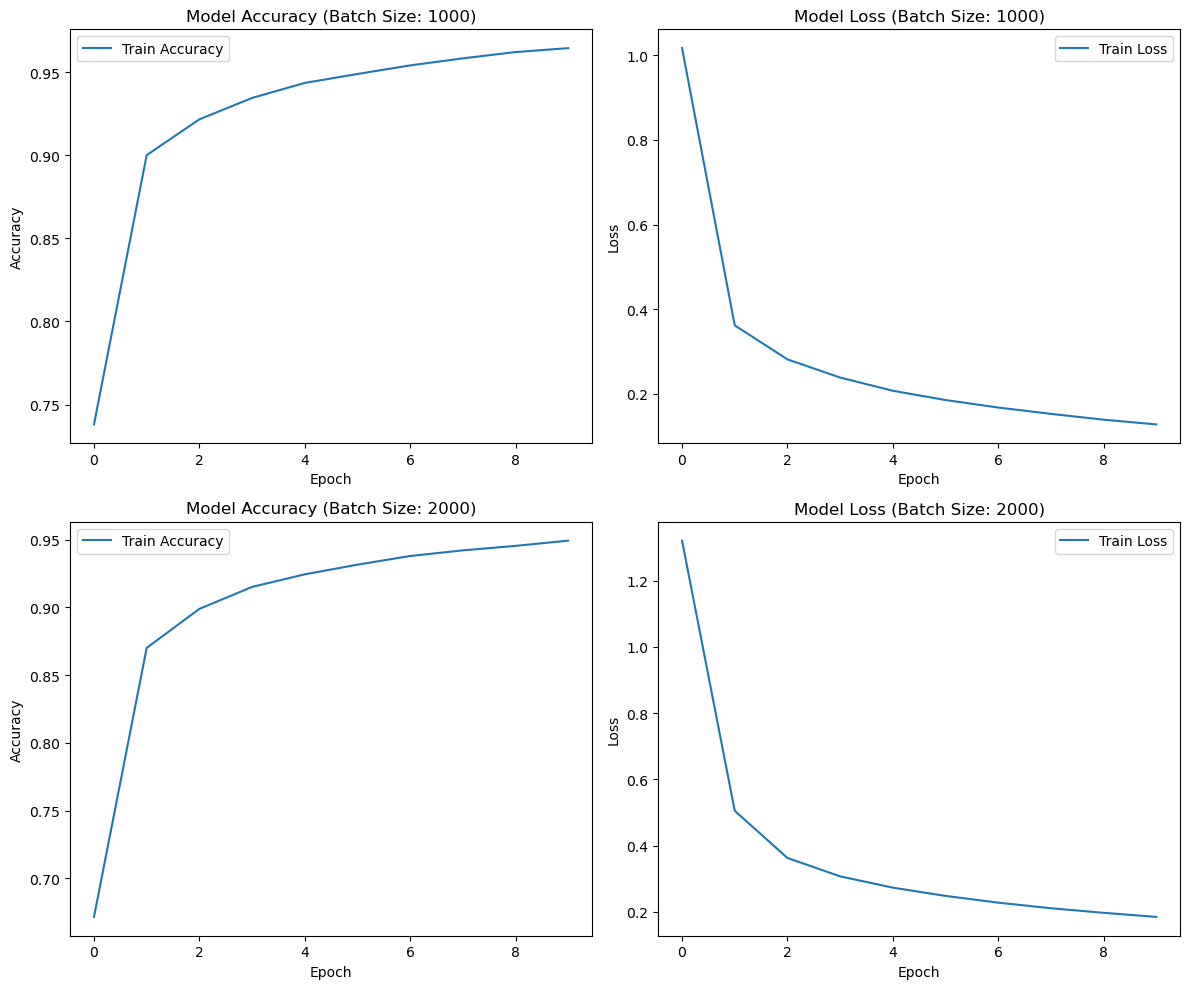

In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

train_path = "C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\train.csv"
test_path = "C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

x_train = train_df.drop(columns=['label']).values / 255.0
y_train = train_df['label'].values

if 'label' in test_df.columns:
    x_test = test_df.drop(columns=['label']).values / 255.0
    y_test = test_df['label'].values
    has_labels = True
else:
    x_test = test_df.values / 255.0
    y_test = None
    has_labels = False

x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

def train_with_batch_size(batch_size):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test) if has_labels else None)
    return history

batch_sizes = [1000, 2000]
histories = {}
for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    histories[batch_size] = train_with_batch_size(batch_size)

plt.figure(figsize=(12, 10))

for i, batch_size in enumerate(batch_sizes, 1):
    history = histories[batch_size]
    
    plt.subplot(len(batch_sizes), 2, 2*i-1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if has_labels:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Model Accuracy (Batch Size: {batch_size})')
    
    plt.subplot(len(batch_sizes), 2, 2*i)
    plt.plot(history.history['loss'], label='Train Loss')
    if has_labels:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Model Loss (Batch Size: {batch_size})')

plt.tight_layout()
plt.show()
